In [24]:
# Import all of the modules

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd #Pandas to load and handle the dataset


In [25]:
#Load the data set from a csv using a convenient re-usable function
def load_dataset(Data_loc):
    return pd.read_csv(Data_loc)

#Load the data via the function
plants_data = load_dataset('./data/Plants_Dataset.csv')

#Alternatively, for a single data sets, we could load with this line
#weather_data = pd.read_csv("./data/Plants_Dataset.csv")

#Check the data is loaded correctly
plants_data.head()
#print(plants_data.target_names)
#Convert to numpy data as that will work with the functions/libraries
plants_data = plants_data.to_numpy()
target_names = plants_data[:,0]

In [26]:
#Train, Test, Split the data

#Lowercase y here is denoting a single columns of data, while Capital X has multiple data lines
#Our X data is every row, but only columns starting after col1
X = plants_data[:,1:]
#Our y data is a single column in array location 0
y = plants_data[:,0]
nclasses = 4

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

CV Train: [0.9047619  0.         0.         0.57894737]
CV Train: [0.61290323 0.         0.         0.37931034]
CV Train: [0.73076923 0.         0.         0.45833333]


C:\Users\ioemaster\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'iris' is not defined

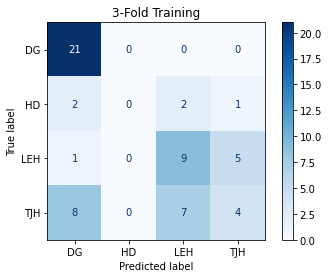

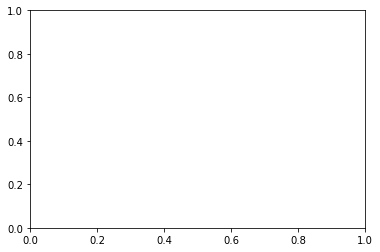

In [29]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', '#0ee844'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue', '#0db537'])
colors = ['darkorange', 'c', 'darkblue', '#05571a']

# Set the number neightbours to use in the classifier
n_neighbors = 30


# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X_train, y_train)



# Return the predictions for the 3-Fold crossvalidation
y_predicted = cross_val_predict(clf, X_train,y_train, cv=3)
# Return the predictions for the test set
y_test_predicted = clf.predict(X_test)
# Construct the confusion matricies
conf_mat_train = confusion_matrix(y_train, y_predicted)
conf_mat_test = confusion_matrix(y_test, y_test_predicted)

print("CV Train:", recall_score(y_train,y_predicted,average=None))
print("CV Train:",precision_score(y_train,y_predicted,average=None))
print("CV Train:",f1_score(y_train,y_predicted,average=None))

# Plot the confusion matrices
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train,
                                 cmap=plt.cm.Blues,ax=ax)
ax.set_title('3-Fold Training')

fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                 display_labels=iris.target_names,
                                 cmap=plt.cm.Blues,ax=ax)
ax.set_title('Testing')
